# Ex4 - Linear Regression

## Imports

In [4]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [5]:
datafile = "lausanne-appart.csv"

Read the data

In [6]:
dataset = pd.read_csv(datafile)

Display first rows

In [7]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [8]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

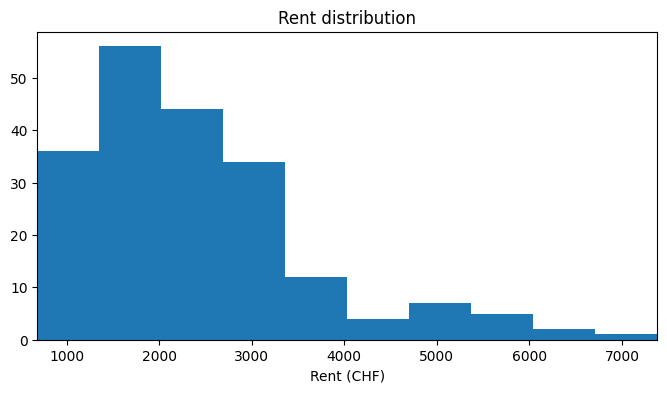

In [9]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)

plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

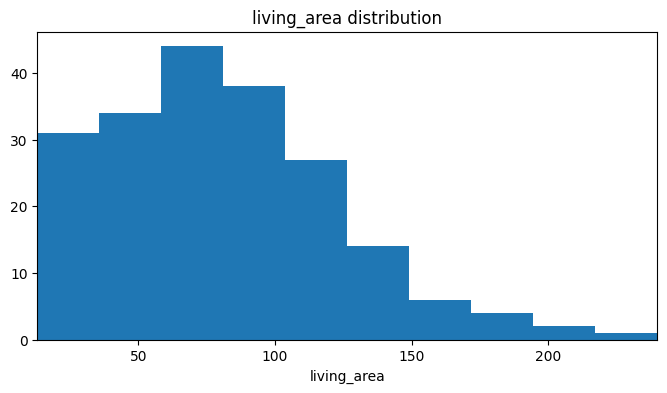

In [10]:
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)

plt.xlabel("living_area")
plt.title("living_area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

Text(0, 0.5, 'renting price')

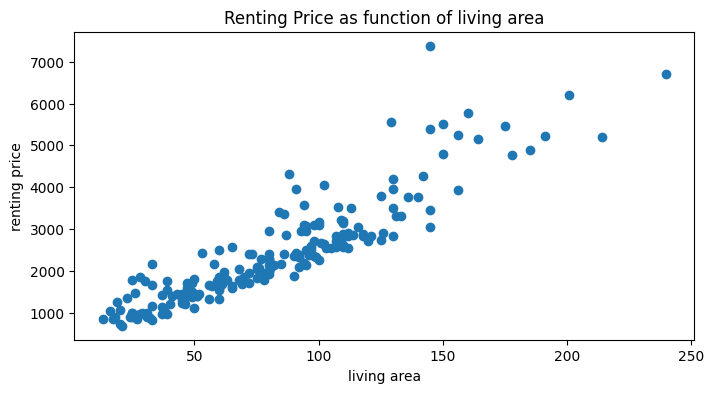

In [11]:
plt.figure(1, figsize=(8,4))
plt.scatter(living_area, rent_price)

plt.title('Renting Price as function of living area')
plt.xlabel('living area')
plt.ylabel('renting price')

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

$$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$$

NOTE: X is the design matrix

Assuming **$x$ is the living area** and **$y$ is the renting price**. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of Part 1.

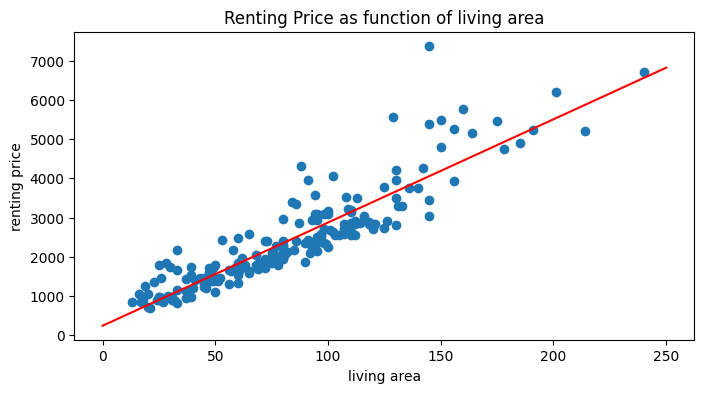

In [12]:
#######################################################################
# Perform the following computation                                   #
#  - get N, the number of samples                                     #
#  - compose X with the 1st column full of 1.0 and the 2nd column     #
#    with the living area (hint: have a look to no.ones() and         #
#    np.column_stack()                                                #
#  - get y as the rent prices                                         #
#  - compute the theta (hint: matrix A to matrix B multiplication can #
#    be done with A.dot(B))                                           #
#  - plot the line (hint: compute a set of x points linearly spaced   #
#    and, with the thetas, compute the corresponding y values)        #
#######################################################################

# --- Redraw Scatter Plot --------------------------------------------
plt.figure(1, figsize=(8,4))
plt.scatter(living_area, rent_price)

plt.title('Renting Price as function of living area')
plt.xlabel('living area')
plt.ylabel('renting price')

# --- Perform Linear Regression --------------------------------------
x = living_area
y = rent_price

N = x.size

# Assemble design matrix X from linear basis functions
X0 = np.ones(N)
X1 = x
X = np.column_stack((X0, X1))

# Compute LS-Solution (Projection onto parameter surface)
theta = np.linalg.inv(X.T@X)@X.T@y

# --- Plot Resulting Line --------------------------------------------
x_ = np.linspace(0,250,2)
y_ = theta[0] + x_*theta[1]
plt.plot(x_, y_, c='red')

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

b) Compute the MSE loss according to the following equation:

$$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$$

NOTE: factor $\frac{1}{2}$ used because it simplifies derivative of the loss function (cancels out factor 2 from 2 in exponent)

In [13]:
#######################################################################
# TODO:                                                               #
#  - define a function h_theta(x, theta_0, theta_1) to compute the    #
#    the hypothesised values of y (the "y_hat")                       #
#  - define a function mse_loss(x, y, y_hat)                          #
#  - use both functions to compute the MSE loss on the dataset        #
#######################################################################

def h_theta(x, theta_0, theta_1):
    y_hat = theta_0 + theta_1*x
    return y_hat

def mse_loss(x, y, y_hat): 
    e_squared = (y_hat-y)**2
    J = 1/(2*N)*sum(e_squared)
    return J


y_hat = h_theta(x, theta[0], theta[1])
print("MSE Loss: ", mse_loss(x, y, y_hat))

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

MSE Loss:  138034.95779787414


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

MSE Loss:  tensor(138034.9578, dtype=torch.float64)


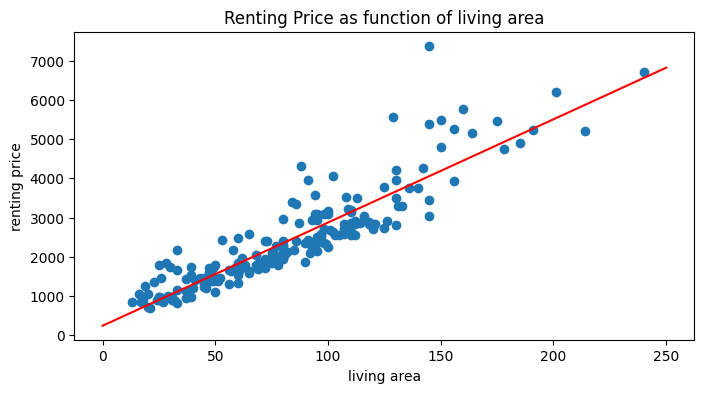

In [14]:
#######################################################################
# Perform the following computation                                   #
#  - in a similar way as in the previous part 2, compute theta0 and   #
#    theta1, plot the computed line                                   #
#  - compute the loss J with these new values of theta0 and theta1,   #
#    for that you may use mse_loss() function defined abouve          #
#######################################################################
import torch

# --- Redraw Scatter Plot --------------------------------------------
plt.figure(1, figsize=(8,4))
plt.scatter(living_area, rent_price)

plt.title('Renting Price as function of living area')
plt.xlabel('living area')
plt.ylabel('renting price')

# --- Perform Linear Regression --------------------------------------
x = living_area
y = rent_price

N = x.size

# Assemble design matrix X from linear basis functions
X0 = np.ones(N)
X1 = x
X = np.column_stack((X0, X1))

# NEW COMPARED TO NUMPY IMPLEMENTATION
X = torch.from_numpy(X.astype('float')) # convert numpy array to torch tensor
y = torch.from_numpy(y.astype('float'))

# Compute LS-Solution (Projection onto parameter surface)
theta = torch.inverse(X.t() @ X) @ X.t() @ y

# --- Plot Resulting Line --------------------------------------------
# NOTE: x_, y_ are plot variables as opposed to x, y, which are data points
x_ = torch.from_numpy(np.linspace(0,250,2)) 
y_ = theta[0] + x_*theta[1]
plt.plot(x_, y_, c='red')

# --- Compute & Print MSE Loss --------------------------------------- 
y_hat = h_theta(x, theta[0], theta[1])
print("MSE Loss: ", mse_loss(x, y, y_hat))

#######################################################################
#                         END OF YOUR CODE                            #
#######################################################################

### Takeaway
Torch tensors similar in usage as numpy arrays!